# <center>Organizaci&oacute;n de Datos</center>
## <center>Trabajo Práctico 1 </center>

## <center>Grupo 21</center>

#### Integrantes: Francisco Juárez, Marcos Bat, Lucas Aldazabal, Valentin Schneider, Gonzalo Rizzo Ehrenbock

<b> <strong> <h2>a) Exploración Inicial </h2>

In [497]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
#IR PONIENDO IMPORTS DE LO Q SE VA NECESITANDO

Cargamos el archivo y hacemos un mini análisis exploratorio 

In [498]:
 #Importamos el dataset del drive de la materia
url='https://drive.google.com/uc?id=1wScqb_M8lq3yL3ZfSZvnLyZbh4ImI7dI'
#ds_propiedades_csv = pd.read_csv(url)
ds_propiedades_csv.shape

(460154, 20)

In [499]:
ds_propiedades = ds_propiedades_csv.copy()

Listamos las columnas para ver que tenemos

In [500]:
ds_propiedades.columns.tolist()

['id',
 'start_date',
 'end_date',
 'created_on',
 'latitud',
 'longitud',
 'place_l2',
 'place_l3',
 'place_l4',
 'place_l5',
 'place_l6',
 'operation',
 'property_type',
 'property_rooms',
 'property_bedrooms',
 'property_surface_total',
 'property_surface_covered',
 'property_price',
 'property_currency',
 'property_title']

Vemos los tipos de datos asociados a cada una:

In [501]:
ds_propiedades.dtypes

id                           object
start_date                   object
end_date                     object
created_on                   object
latitud                     float64
longitud                    float64
place_l2                     object
place_l3                     object
place_l4                     object
place_l5                     object
place_l6                    float64
operation                    object
property_type                object
property_rooms              float64
property_bedrooms           float64
property_surface_total      float64
property_surface_covered    float64
property_price              float64
property_currency            object
property_title               object
dtype: object

Ahora chequeamos las primeras 5 celdas:

In [502]:
ds_propiedades.head()

,id,start_date,end_date,created_on,latitud,longitud,place_l2,place_l3,place_l4,place_l5,place_l6,operation,property_type,property_rooms,property_bedrooms,property_surface_total,property_surface_covered,property_price,property_currency,property_title
0,XZq2dFGxBiboHY3Bo/tqlw==,2021-09-09,2022-01-27,2021-09-09,-38.957632,-68.105443,Neuquén,NaN,NaN,NaN,NaN,Venta,Casa,6.0,NaN,NaN,206.0,NaN,NaN,Casa - Capital
1,8afoK+yMH/rnnlYiktwgNA==,2021-09-09,2021-10-23,2021-09-09,-34.888878,-56.092368,Montevideo,NaN,NaN,NaN,NaN,Venta,Casa,4.0,3.0,193.0,193.0,390000.0,USD,Casa - Malvín
2,iVaG5rBB47dd1Ya4BMXREA==,2021-09-09,2022-03-09,2021-09-09,-32.488717,-58.257499,Entre Ríos,NaN,NaN,NaN,NaN,Venta,Casa,NaN,NaN,110.0,45.0,47000.0,USD,Casa - Uruguay
3,QE1QVMWKAHWkd0qT0FtPWA==,2021-09-09,2022-01-27,2021-09-09,-34.900165,-54.808453,Maldonado,NaN,NaN,NaN,NaN,Venta,Casa,NaN,3.0,NaN,180.0,400000.0,USD,Casa - El Chorro
4,tJ5lSk7IysG/71OGhacNZA==,2021-09-09,2022-01-27,2021-09-09,-38.954528,-68.041862,Neuquén,NaN,NaN,NaN,NaN,Venta,PH,3.0,2.0,NaN,98.0,102000.0,USD,PH - Villa Farrell


Filtramos el dataframe por lo pedido en la consigna

In [503]:
tipos_viviendas = ['Casa', 'PH', 'Departamento']
ds_propiedades = ds_propiedades[(ds_propiedades['operation'] == 'Venta') & 
                        (ds_propiedades['property_type'].isin(tipos_viviendas)) & 
                        (ds_propiedades['place_l2'] == 'Capital Federal') & 
                        (ds_propiedades['property_currency'] == 'USD')]

#reseteamos index por que el dataframe quedo mal indexado luego de filtrar segun los datos que nos interesan
ds_propiedades.reset_index(drop=True, inplace=True)

ds_propiedades.drop(columns=['id', 'start_date', 'end_date', 'created_on', 'place_l2', 'operation', 'property_currency'], inplace=True)

Variables Cuantitativas: calculamos r medidas de resumen: media, mediana, q1,
q3,moda. <br>

In [504]:
variables_cuantitativas = ["property_rooms", "property_bedrooms", "property_surface_total", "property_surface_covered", "property_price", "latitud", "longitud"]
ds_variables_cuantitativas = ds_propiedades[variables_cuantitativas]
ds_variables_cuantitativas_resumen = ds_variables_cuantitativas.describe()
ds_variables_cuantitativas_resumen.drop(['count', 'min', 'max', 'std'], inplace=True) #Sacamos las variables que no nos importan


#calcualamos la moda
mode = ds_propiedades[variables_cuantitativas].mode()
ds_variables_cuantitativas_resumen = ds_variables_cuantitativas_resumen.append(mode) #La agregamos al dataframe

ds_variables_cuantitativas_resumen.rename(index={'50%': 'mediana', '25%': 'q1', '75%': 'q3', 0:'moda', 'mean':'media'}, inplace=True) #renombramos labels
ds_variables_cuantitativas_resumen


,property_rooms,property_bedrooms,property_surface_total,property_surface_covered,property_price,latitud,longitud
media,2.822799,2.014629,109.09297,87.931932,226238.207185,-34.591481,-58.449795
q1,2.000000,1.000000,45.00000,40.000000,95000.000000,-34.615975,-58.466522
mediana,3.000000,2.000000,65.00000,58.000000,143900.000000,-34.595790,-58.439000
q3,4.000000,3.000000,105.00000,88.000000,237000.000000,-34.577413,-58.408862
moda,3.000000,1.000000,50.00000,40.000000,110000.000000,-34.541250,-58.472966


Variables Cualitativas: mostramos cantidad de valores posibles, y frecuencias de cada uno.
Elegimos como variables cualitativas a "place_l3" y "property type". Decidimos no incluir las siguientes por estos motivos:
"place_l2" y "property_currency": Al ya estar filtrados, todos los valores seran el mismo.
"property_title": Ya que seran todos distintos.
"place_l4", "place_l5", "place_l6" : Ya que son todos nulos para el filtro seleccionado.

In [505]:
variables_cualitativas = ['place_l3', 'property_type']
ds_propiedades.place_l3.value_counts()

Palermo                 14308
Belgrano                 8898
Caballito                7168
Recoleta                 6282
Villa Urquiza            4673
Almagro                  4081
Nuñez                    3546
Villa Crespo             3189
Flores                   3110
Barrio Norte             2975
Balvanera                2553
Colegiales               1951
Villa Devoto             1921
Villa del Parque         1829
Saavedra                 1829
Puerto Madero            1493
San Telmo                1380
San Cristobal            1300
San Nicolás              1295
Retiro                   1250
Barracas                 1246
Boedo                    1237
Floresta                 1195
Monserrat                1115
Parque Chacabuco         1073
Villa Pueyrredón         1011
Coghlan                   984
Villa Luro                727
Mataderos                 719
Chacarita                 697
Liniers                   668
Villa Ortuzar             662
Parque Patricios          639
Villa Luga

Una medida muy utilizada en la venta de propiedades es el precio por metro cuadrado según el barrio. Por lo tanto, agregamos una columna con este valor.

In [506]:

# ds_propiedades['price_per_m2'] = ds_propiedades['property_price'] / ds_propiedades['property_surface_total']
# #average price per m2 by place_l3
# ds_propiedades.groupby('place_l3')['price_per_m2'].mean().sort_values(ascending=False)
# # precio_mx2_barrio


# TO DO!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!11




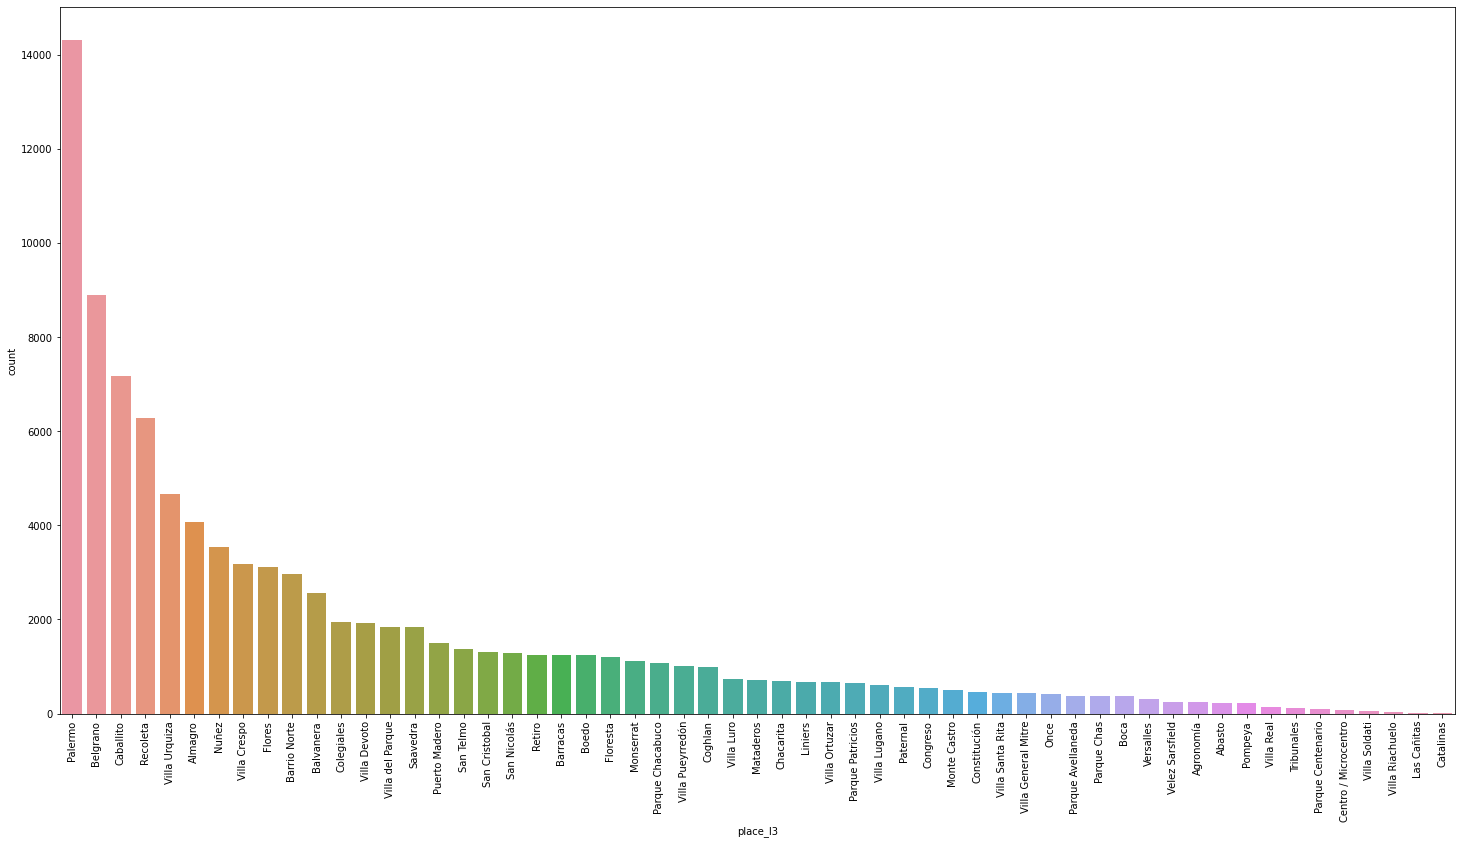

In [507]:
#graficamos barplot de place_l3
plt.figure(figsize=(25, 13))
sns.countplot(x='place_l3', data=ds_propiedades, order=ds_propiedades.place_l3.value_counts().index)
plt.xticks(rotation=90)
plt.show()

In [508]:
ds_propiedades.property_type.value_counts()

Departamento    80829
PH               9266
Casa             4154
Name: property_type, dtype: int64

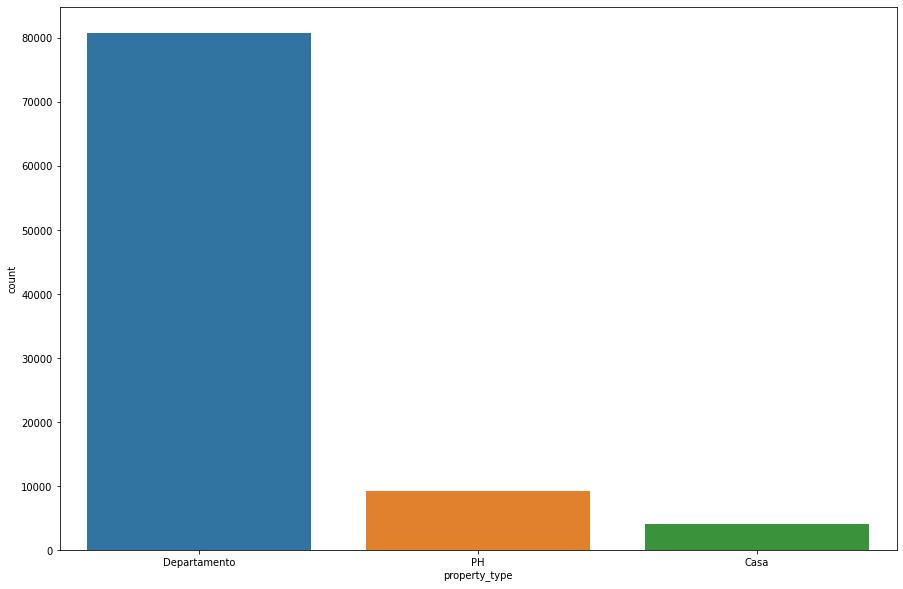

In [509]:
#graficamos barplot de property_types
plt.figure(figsize=(15, 10))
sns.countplot(x='property_type', data=ds_propiedades, order=ds_propiedades.property_type.value_counts().index)

plt.show()

Las variables que percibimos irrelevantes para el análisis fueron: Los Ids ya que no aportan valor al analizarlos y las mencionadas arriba, que decidimos no analizarlas en el caso cualitativo y cuantitativo.

Siguiendo con el análisis gráfico de las distribuciones de las variables, hacemos un pairplot:


In [510]:
#DESCOMENTAR
#sns.pairplot(ds_propiedades[variables_cuantitativas], diag_kind='kde', height=3)
#plt.show()

Análisis de las correlaciones:

In [511]:
ds_propiedades[variables_cuantitativas].corr()

,property_rooms,property_bedrooms,property_surface_total,property_surface_covered,property_price,latitud,longitud
property_rooms,1.000000,0.871940,0.067211,0.076097,0.488934,0.005521,-0.008324
property_bedrooms,0.871940,1.000000,0.067702,0.075075,0.425386,0.003162,-0.008556
property_surface_total,0.067211,0.067702,1.000000,0.604311,0.085235,0.025348,-0.015056
property_surface_covered,0.076097,0.075075,0.604311,1.000000,0.056238,0.002352,-0.001155
property_price,0.488934,0.425386,0.085235,0.056238,1.000000,0.016635,0.023314
latitud,0.005521,0.003162,0.025348,0.002352,0.016635,1.000000,-0.239235
longitud,-0.008324,-0.008556,-0.015056,-0.001155,0.023314,-0.239235,1.000000


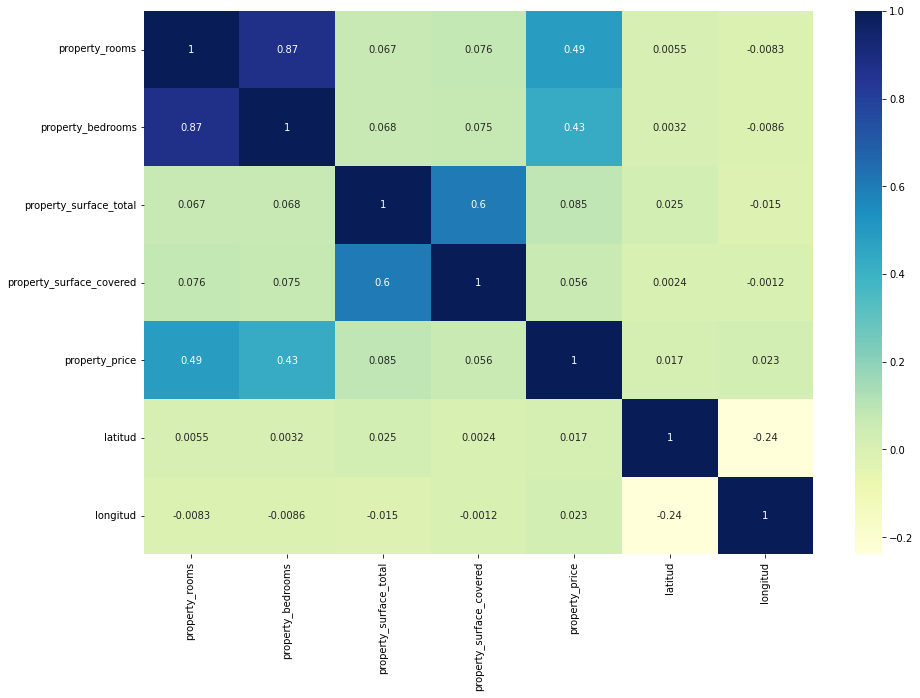

In [512]:
plt.figure(figsize=(15, 10))
sns.heatmap(ds_propiedades[variables_cuantitativas].corr(),annot=True,cmap="YlGnBu")
plt.show()

<h2>Conclusiones sobre los datos </h2>
Correlaciones: Podemos ver que las que más estan relacionadas son:
    <br>* La cantidad de habitaciones con la cantidad de dormitorios, esto nos parece bien porque las viviendas más grandes, suelen tener más dormitorios
    <br>* La superficie total con la superficie cubierta, lo que tiene sentido ya que la superficie total incluye a la superficie cubierta. 
    <br>* La cantidad de habitaciones y el precio, esto no nos sorprende debido a que normalmente a mayor cantidad de habitaciones, más grande es la vivienda y más cara se vuelve (lo mismo con la cantidad de dormitorios y el precio)

Por otro lado, nos sorprende que no haya correlacion entre la superficie y el precio. Esto puede deberse a que hay viviendas grandes que son baratas al no estar en un barrio muy cotizado y otras pequeñas que son muy caras. <br>

En la distribución de tipo de vivienda notamos gran cantidad de departamentos frente a la cantidad de casa y PHs. Esto puede deberse a que la mayoría de las viviendas en Capital Federal son departamentos. <br>  <br>
En la distribución de localidades, notamos una gran disparidad entre estas. Los lugares con mayor cantidad de viviendas en venta son Palermo, Belgrano, Caballito y Recoleta. Esto puede deberse a que son las zonas mas céntricas de la ciudad. <br>  <br>
Notamos que la media de la logitud y la longitud, no es el centro geografico de la ciudad (Caballito) si no que esta más cerca de Palermo, esto se debe a que la mayoría de los anuncios de venta publicados son de viviendas en este barrio. <br>  <br>


Notamos que las variables "place_l6", "place_l5" y "place_l4" tienen todos sus valores nulos, por lo que no aportan información. <br>



<b> <strong> <h2>b) Datos Faltantes </h2>

Vemos los porcentajes de datos nulos por columna

In [513]:
filas_totales=ds_propiedades.shape[0]
df_nulos = ds_propiedades.isna().sum()/filas_totales*100
print(df_nulos)

latitud                       3.957602
longitud                      3.957602
place_l3                      0.442445
place_l4                     96.134707
place_l5                    100.000000
place_l6                    100.000000
property_type                 0.000000
property_rooms                1.107704
property_bedrooms            11.657418
property_surface_total        5.139577
property_surface_covered      3.558658
property_price                0.000000
property_title                0.000000
dtype: float64


Graficamos:

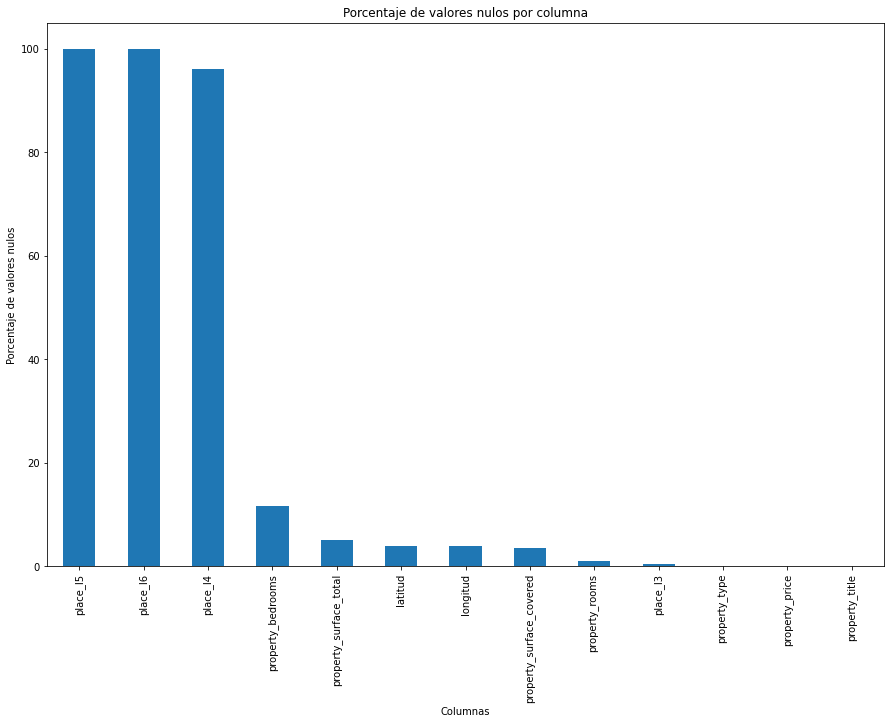

In [514]:
from matplotlib.pyplot import xlabel

plt.figure(figsize=(15, 10))
#plot de valores nulos por columna
df_nulos.sort_values(ascending=False, inplace=True)
df_nulos.plot.bar(xlabel='Columnas', ylabel='Porcentaje de valores nulos', title='Porcentaje de valores nulos por columna')
plt.show()

Calculamos los datos faltantes por fila

In [515]:
df_nulos_filas = ds_propiedades.isnull().sum(axis=1)/ds_propiedades.shape[1]*100
print(df_nulos_filas)

0        46.153846
1        23.076923
2        23.076923
3        30.769231
4        30.769231
           ...    
94244    23.076923
94245    23.076923
94246    23.076923
94247    23.076923
94248    23.076923
Length: 94249, dtype: float64


Graficamos:

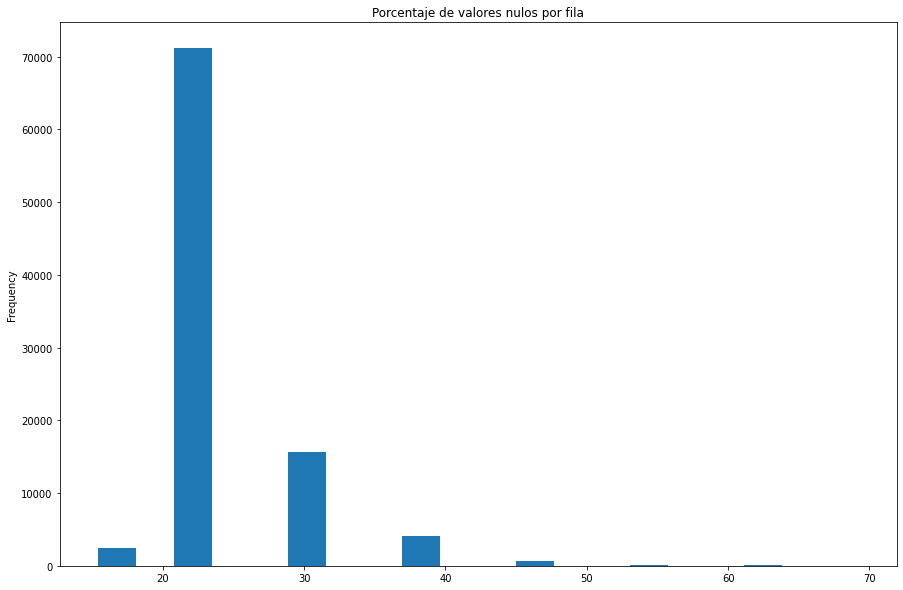

In [516]:
plt.figure(figsize=(15, 10))

df_nulos_filas.sort_values(inplace=True)
df_nulos_filas.plot.hist(bins=20, xlabel='Porcentaje de valores nulos', ylabel='Cantidad de filas', title='Porcentaje de valores nulos por fila')

plt.show()

Acá podemos ver que las variables "place_l6", "place_l5" y "place_l4" tienen una grandísima cantidad de valores nulos. Por esto decidimos eliminarlas.


In [517]:
columnas_eliminar_NANs=["place_l6", "place_l5", "place_l4"]
ds_propiedades.drop(columnas_eliminar_NANs, axis='columns', inplace=True)
print(f'Columnas restantes: {ds_propiedades.columns.tolist()}')

Columnas restantes: ['latitud', 'longitud', 'place_l3', 'property_type', 'property_rooms', 'property_bedrooms', 'property_surface_total', 'property_surface_covered', 'property_price', 'property_title']


Primero que nada vamos a chequear si hay filas duplicadas en el dataset:

In [518]:
duplicados = ds_propiedades[ds_propiedades.duplicated()]

duplicados_casa = duplicados[duplicados['property_type'] == 'Casa']
duplicados_ph = duplicados[duplicados['property_type'] == 'PH']
duplicados_departamentos = duplicados[duplicados['property_type'] == 'Departamento']

print(f"Cantidad de duplicadas: {duplicados.shape[0]}")
print(f"Cantidad de casas duplicadas: {duplicados_casa.shape[0]}")
print(f'Cantidad de ph duplicadas: {duplicados_ph.shape[0]}')
print(f'Cantidad de departamentos duplicadas: {duplicados_departamentos.shape[0]}')

Cantidad de duplicadas: 11315
Cantidad de casas duplicadas: 377
Cantidad de ph duplicadas: 843
Cantidad de departamentos duplicadas: 10095


Como puede haber varios departamentos y PHs en la mismas coordenadas de Latitud y Longitud, ya que esto mide en el plano XY nomás, no podemos asumir que dos propiedades que compartan la Latitud y Longitud sean la misma. En cambio, para el caso de las Casas, es imposible que hayan dos casas en exactamente el mismo lugar, así que decidimos droppear estas filas del dataset como ya que inferimos que son duplicadas. Tampoco podemos utilizar el titulo de la publicación ya que en varios casos donde hay publicaciones de departamentos y/o PHs de la misma propiedad horizontal, el titulo es el mismo debido a que es la constructora vendiendo las propiedades a estrenar. 

In [519]:
ds_propiedades.drop(duplicados_casa.index, inplace=True)

Para bedrooms vimos que existe una gran correlacion con las rooms, no solo por informacion del dataframe, sino tambien por el dominio del problema donde sabemos que en rooms estan incluidas las bedrooms. Por esto decidimos hacer una regresion lineal para completar los datos faltantes

In [520]:
from matplotlib.pyplot import plot
from sklearn.linear_model import LinearRegression

from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer

#Hacemos una regresion lineal para predecir los valores nulos de property_bedrooms
bedrooms_y_rooms_por_depto = ds_propiedades[['property_bedrooms', 'property_rooms', 'property_price']].copy()

lr = LinearRegression()
imp = IterativeImputer(estimator=lr, missing_values=np.nan, max_iter=20, verbose=0, random_state=0)

bedrooms_y_rooms_por_depto_completo = imp.fit_transform(bedrooms_y_rooms_por_depto)

bedrooms_y_rooms_por_depto_completo = pd.DataFrame(bedrooms_y_rooms_por_depto_completo, columns=['property_bedrooms', 'property_rooms', 'property_price'])

bedrooms_y_rooms_por_depto_completo['property_rooms'] = bedrooms_y_rooms_por_depto_completo['property_rooms'].astype(int)
bedrooms_y_rooms_por_depto_completo['property_bedrooms'] = bedrooms_y_rooms_por_depto_completo['property_bedrooms'].astype(int)

Para demostrar que al eliminar las filas con valores nulos, no se pierde ni altera información graficamos  un scatterplot de la distribucionentre rooms y bedrooms previa y posterior a la eliminación de los valores nulos, se ve sque los que eran nulos antes, ahora se predicen.

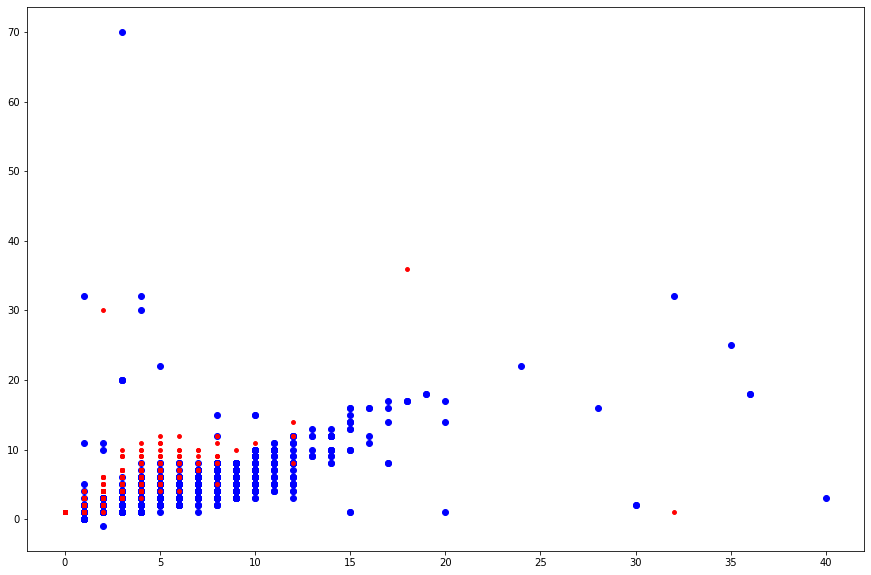

In [521]:
plt.figure(figsize=(15, 10))
plt.scatter(x=bedrooms_y_rooms_por_depto_completo['property_rooms'], y=bedrooms_y_rooms_por_depto_completo['property_bedrooms'], color='blue')
# t.scatter(x=bedrooms_y_rooms_por_depto['property_rooms'], y=bedrooms_y_rooms_por_depto['property_bedrooms'], color="blue", s=5.0)

#PONER LEYENDASSSSSSSS

filas_datos_faltantes = bedrooms_y_rooms_por_depto[bedrooms_y_rooms_por_depto.isnull().any(axis=1)]
datos_agregados = filas_datos_faltantes.merge(bedrooms_y_rooms_por_depto_completo, how='inner', left_index=True, right_index=True)[['property_bedrooms_y', 'property_rooms_y']]

plt.scatter(x=datos_agregados['property_bedrooms_y'], y=datos_agregados['property_rooms_y'], color='red', s=15)

plt.show()

In [522]:
filas_latitud_NaN = ds_propiedades[ds_propiedades['latitud'].isnull()].shape[0]
filas_longitud_NaN = ds_propiedades[ds_propiedades['longitud'].isnull()].shape[0]
filas_latitud_y_longitud_Nan = ds_propiedades[ds_propiedades['latitud'].isnull() & ds_propiedades['longitud'].isnull()].shape[0] #Estos los droppeamos, y para predecir longitud y latitud usamos las filas que si tengan place_l3

print(f"Cantidad de filas con latitud NaN: {filas_latitud_NaN}")
print(f'Cantidad de filas con longitud NaN: {filas_longitud_NaN},')
print(f'Cantidad de filas con Latitud y Longitud NaN: {filas_latitud_y_longitud_Nan}.')
print(f'Entonces las filas que que tienen Latitud como Nan y no a longitud son: {filas_latitud_NaN-filas_latitud_y_longitud_Nan}')

Cantidad de filas con latitud NaN: 3719
Cantidad de filas con longitud NaN: 3719,
Cantidad de filas con Latitud y Longitud NaN: 3719.
Entonces las filas que que tienen Latitud como Nan y no a longitud son: 0


Para predecir la Latitud y Longitud de las viviendas faltantes, al ver que todas las filas en las que falta la Latitud, también falta la Longitud. Podemos usar el barrio (place_l3) de esta para tener una certeza de donde se puede encontrar. Así que calculamos la mediana de Latitud y Longitud para cada barrio (place_l3) y ponemos estas en su lugar. 

Primero droppeamos las filas que tienen como valores faltantes al barrio (place_l3) y a la latitud y longitud

In [523]:
ds_propiedades.drop(ds_propiedades[ds_propiedades['place_l3'].isnull() & 
                    ds_propiedades['latitud'].isnull()].index,
                    inplace=True)

Completamos los valores faltantes de longitud y latitud con las medianas del barrio en el que se ubiquen 

In [524]:
median_coord_place_l3 = ds_propiedades.groupby('place_l3')[['latitud', 'longitud']].median()


ds_propiedades['latitud'] = ds_propiedades.apply(lambda x: median_coord_place_l3.loc[x['place_l3']]['latitud'] if np.isnan(x['latitud']) else x['latitud'], axis=1)
ds_propiedades['longitud'] = ds_propiedades.apply(lambda x: median_coord_place_l3.loc[x['place_l3']]['longitud'] if np.isnan(x['longitud']) else x['longitud'], axis=1)

ds_propiedades[ds_propiedades['latitud'].isnull()]

,latitud,longitud,place_l3,property_type,property_rooms,property_bedrooms,property_surface_total,property_surface_covered,property_price,property_title


Completamos los valores faltantes de barrio (place_l3) a partir de la latitud y longitud que tiene cada publicacion


In [525]:
median_coord_place_l3 = median_coord_place_l3.reset_index()

def get_barrio(lat, lon):
    median_coord_place_l3['distancia'] = median_coord_place_l3.apply(lambda x: np.sqrt((x['latitud'] - lat)**2 + (x['longitud'] - lon)**2), axis=1)
    return median_coord_place_l3.sort_values(by=['distancia']).iloc[0]['place_l3']

propiedades_sin_barrio = ds_propiedades[ds_propiedades['place_l3'].isna()]

for i in range(propiedades_sin_barrio.shape[0]):
    lat = propiedades_sin_barrio.iloc[i]['latitud']
    lon = propiedades_sin_barrio.iloc[i]['longitud']
    barrio = get_barrio(lat, lon)
    ds_propiedades.loc[ds_propiedades['latitud'] == lat, 'place_l3'] = barrio

-31.6789 -63.87964
Villa Real
-34.581285 -58.4697029
Villa Ortuzar
-34.6065771 -58.4490717
Parque Centenario
-33.08103 -68.46814
Villa Real
-31.3904308 -64.1790041
Villa Real
-34.6325981 -58.4809536
Floresta
-41.1638257 -71.4389226
Liniers
-33.528049 -64.168459
Villa Real
-27.4692131 -58.8306349
Nuñez
-34.6132735 -58.391893
Congreso
-34.6216374 -58.3915663
Constitución
-31.4737053 -64.1931419
Villa Real
-31.3629401217 -64.569103957
Villa Real
-34.620966 -58.4738312
Villa Santa Rita
-33.08103 -68.46814
Villa Real
-33.1099548 -60.7951508
Saavedra
-33.1224585674 -60.7127696003
Saavedra
-33.0246609 -60.6166104
Saavedra
-31.6106578 -60.697294
Saavedra
-32.5560547 -60.8508448
Saavedra
-24.770804 -65.400812
Saavedra
-33.023382 -60.6312218
Saavedra
-33.1819750162 -60.724335609
Saavedra
-24.770804 -65.400812
Saavedra
-31.680757 -63.880112
Villa Real
-32.5746765 -60.8499985
Saavedra
-33.060356 -68.479394
Villa Real
-31.6789 -63.87964
Villa Real
-33.081035 -68.468102
Villa Real
-31.6789 -63.87964

In [527]:
# #Hacemos una regresion lineal para predecir los valores nulos de property_surface_total
surface_y_rooms_por_depto = ds_propiedades[['property_surface_total', 'property_rooms', 'property_price']]
surface_y_rooms_por_depto_completo = imp.fit_transform(surface_y_rooms_por_depto)



'''x_train, x_test, y_train, y_test = train_test_split(dataset[features].values, 
                                                    dataset[target].values, 
                                                    test_size=0.2,    #20% al conjunto de test
                                                    random_state=13,  #para poder reproducir el experimento
                                                    stratify=dataset[target].values) #estratificado para mantener proporcion'''


'x_train, x_test, y_train, y_test = train_test_split(dataset[features].values, \n                                                    dataset[target].values, \n                                                    test_size=0.2,    #20% al conjunto de test\n                                                    random_state=13,  #para poder reproducir el experimento\n                                                    stratify=dataset[target].values) #estratificado para mantener proporcion'